# CS 4661 Project

# Buy Or Sell a Stock? - Logistic Regression

In [27]:
# import necessary tools
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [28]:
# read dataset
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv")
import datetime as dt
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df['date']=stock_df['date'].map(dt.datetime.toordinal)
# gets the top 10 stocks in alphabetical order
# stock_df_top10 sstock_df_aal = stock_df[0:1259]tock_df[0:12590]

In [29]:
# stock_df_top10[::1259]
# stock_df['date']=stock_df['date'].map(dt.datetime.fromordinal)
# import pandas_ta
# get only AAL data


stock_df_aal = stock_df[0:1259]
# stock_df_aal.ta.ema(close='close', length=10, append=True)
stock_df_aal.insert(0,"weekly_avg", " ")
stock_df_aal.insert(0,"30_entry_avg", " ")
stock_df_aal.insert(0,"50_entry_avg", " ")
stock_df_aal.insert(0,"100_entry_avg", " ")
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,open,high,low,close,volume,Name
0,,,,,734907,15.07,15.12,14.63,14.75,8407500,AAL
1,,,,,734910,14.89,15.01,14.26,14.46,8882000,AAL
2,,,,,734911,14.45,14.51,14.10,14.27,8126000,AAL
3,,,,,734912,14.30,14.94,14.25,14.66,10259500,AAL
4,,,,,734913,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...,...,...,...,...
1254,,,,,736726,54.00,54.64,53.59,53.88,3623078,AAL
1255,,,,,736727,53.49,53.99,52.03,52.10,5109361,AAL
1256,,,,,736730,51.99,52.39,49.75,49.76,6878284,AAL
1257,,,,,736731,49.32,51.50,48.79,51.18,6782480,AAL


In [30]:
#populate new columns of the dataset
pd.options.mode.chained_assignment = None  # default='warn'
for x in range(7,1259):
    stock_df_aal["weekly_avg"][x] = stock_df_aal["close"][x-7:x].mean()
for x in range(37,1259):
    stock_df_aal["30_entry_avg"][x] = stock_df_aal["close"][x-30:x].mean()
for x in range(57,1259):
    stock_df_aal["50_entry_avg"][x] = stock_df_aal["close"][x-50:x].mean()
for x in range(107,1259):
    stock_df_aal["100_entry_avg"][x] = stock_df_aal["close"][x-100:x].mean()

stock_df_aal['10 Day Avg'] = stock_df_aal['close'].rolling(window=10).mean()
stock_df_aal['Corr'] = stock_df_aal['close'].rolling(window=10).corr(stock_df_aal['10 Day Avg'])
stock_df_aal['Open-Close'] = stock_df_aal['open'] - stock_df_aal['close'].shift(1)
stock_df_aal['Close-Open'] = stock_df_aal['close'] - stock_df_aal['open'] 
stock_df_aal['Open-Open'] = stock_df_aal['open'] - stock_df_aal['open'].shift(1)
stock_df_aal = stock_df_aal.dropna()
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,open,high,low,close,volume,Name,10 Day Avg,Corr,Open-Close,Open-Open
18,,,,13.747143,734934,14.70,14.93,14.50,14.82,9125300,AAL,13.764,-0.361020,0.13,0.18
19,,,,13.97,734935,14.99,15.20,14.84,14.92,10593700,AAL,13.899,-0.060018,0.17,0.29
20,,,,14.185714,734938,14.85,15.15,14.71,15.13,6961800,AAL,14.110,0.521595,-0.07,-0.14
21,,,,14.428571,734939,15.14,15.60,14.95,15.50,8999100,AAL,14.334,0.789761,0.01,0.29
22,,,,14.698571,734940,15.54,16.20,15.48,15.91,11380000,AAL,14.584,0.903099,0.04,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,50.3245,52.286,54.097667,54.112857,736726,54.00,54.64,53.59,53.88,3623078,AAL,54.883,0.096612,-0.32,0.92
1255,50.4273,52.4158,54.177333,53.482857,736727,53.49,53.99,52.03,52.10,5109361,AAL,54.287,0.376618,-0.39,-0.51
1256,50.4897,52.504,54.199333,53.098571,736730,51.99,52.39,49.75,49.76,6878284,AAL,53.453,0.629746,-0.11,-1.50
1257,50.5244,52.5262,54.127333,52.628571,736731,49.32,51.50,48.79,51.18,6782480,AAL,52.742,0.703482,-0.44,-2.67


In [31]:
stock_df_aal['Buy or Sell'] = np.where(stock_df_aal['Close-Open'] < 0,1,-1)
# -1 indicates we should sell the stock
# 1 indicates we should buy the stock
stock_df_aal


,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,open,high,low,close,volume,Name,10 Day Avg,Corr,Open-Close,Open-Open,Buy or Sell
18,,,,13.747143,734934,14.70,14.93,14.50,14.82,9125300,AAL,13.764,-0.361020,0.13,0.18,-1
19,,,,13.97,734935,14.99,15.20,14.84,14.92,10593700,AAL,13.899,-0.060018,0.17,0.29,-1
20,,,,14.185714,734938,14.85,15.15,14.71,15.13,6961800,AAL,14.110,0.521595,-0.07,-0.14,1
21,,,,14.428571,734939,15.14,15.60,14.95,15.50,8999100,AAL,14.334,0.789761,0.01,0.29,-1
22,,,,14.698571,734940,15.54,16.20,15.48,15.91,11380000,AAL,14.584,0.903099,0.04,0.40,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,50.3245,52.286,54.097667,54.112857,736726,54.00,54.64,53.59,53.88,3623078,AAL,54.883,0.096612,-0.32,0.92,1
1255,50.4273,52.4158,54.177333,53.482857,736727,53.49,53.99,52.03,52.10,5109361,AAL,54.287,0.376618,-0.39,-0.51,1
1256,50.4897,52.504,54.199333,53.098571,736730,51.99,52.39,49.75,49.76,6878284,AAL,53.453,0.629746,-0.11,-1.50,1
1257,50.5244,52.5262,54.127333,52.628571,736731,49.32,51.50,48.79,51.18,6782480,AAL,52.742,0.703482,-0.44,-2.67,1


In [34]:
stock_df_aal = stock_df_aal[107:1259]
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,open,high,low,close,volume,Name,10 Day Avg,Corr,Open-Close,Open-Open,Buy or Sell
125,17.2359,17.5908,17.953,19.115714,735088,18.99,19.13,18.90,18.98,4269900,AAL,19.111,-0.526475,0.12,0.15,-1
126,17.2628,17.6138,18.046667,19.084286,735089,18.91,19.08,18.56,18.60,4720600,AAL,19.062,-0.695065,-0.07,-0.08,1
127,17.281,17.6324,18.123,18.977143,735092,18.49,18.88,18.07,18.82,4674800,AAL,19.021,-0.727778,-0.11,-0.42,1
128,17.2969,17.6574,18.203,18.897143,735093,18.86,18.95,16.29,16.36,78591200,AAL,18.737,0.270921,0.04,0.37,-1
129,17.2905,17.63,18.188333,18.531429,735094,16.05,16.34,15.35,16.17,28026200,AAL,18.419,0.768002,-0.31,-2.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,50.3245,52.286,54.097667,54.112857,736726,54.00,54.64,53.59,53.88,3623078,AAL,54.883,0.096612,-0.32,0.92,1
1255,50.4273,52.4158,54.177333,53.482857,736727,53.49,53.99,52.03,52.10,5109361,AAL,54.287,0.376618,-0.39,-0.51,1
1256,50.4897,52.504,54.199333,53.098571,736730,51.99,52.39,49.75,49.76,6878284,AAL,53.453,0.629746,-0.11,-1.50,1
1257,50.5244,52.5262,54.127333,52.628571,736731,49.32,51.50,48.79,51.18,6782480,AAL,52.742,0.703482,-0.44,-2.67,1


<AxesSubplot:>

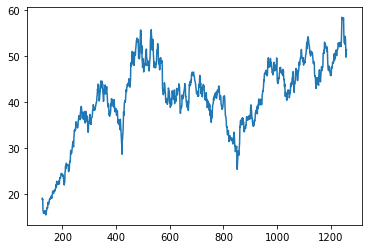

In [35]:
# Shows the closing prices of the stock in the past 3 years
stock_df_aal.close.plot()

In [38]:
# Split data into feature set and target set
feature_cols_1 = ["date","100_entry_avg","50_entry_avg","30_entry_avg","weekly_avg"]
feature_cols_2 = ["date","open", "10 Day Avg", "Corr", "Open-Close", "Open-Open"]

# features variable (X)
X_all_1 = scale(stock_df_aal[feature_cols_1])
X_all_2 = scale(stock_df_aal[feature_cols_2])

# target variables (y)
y = stock_df_aal["Buy or Sell"]



In [42]:
# split data into training and testing
import math
s_f = .6
n_train = math.floor(s_f * X_all_1.shape[0])
n_test = math.ceil((1-s_f) * X_all_1.shape[0])

X_train_all_1 = X_all_1[:n_train]
y_train_all_1 = y[:n_train]
X_test_all_1 = X_all_1[n_train:]
y_test_all_1 = y[n_train:]

X_train_all_2 = X_all_2[:n_train]
y_train_all_2 = y[:n_train]
X_test_all_2 = X_all_2[n_train:]
y_test_all_2 = y[n_train:]


print(X_train_all_1.shape)
print(X_test_all_2.shape)
print(y_train_all_1.shape)
print(y_test_all_2.shape)

(680, 5)
(454, 6)
(680,)
(454,)


In [43]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Use logistic regression on the "date","100_entry_avg","50_entry_avg","30_entry_avg","weekly_avg" features
log_regression_all_1 = LogisticRegression()


log_regression_all_1.fit(X_train_all_1,y_train_all_1)
y_predict_all_1 = log_regression_all_1.predict(X_test_all_1)
print(y_predict_all_1)
accuracy = accuracy_score(y_predict_all_1,y_test_all_1)
print(accuracy)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1

In [44]:
# Use logistic regression on the "date","open", "10 Day Avg", "Corr", "Open-Close", "Open-Open" features
log_regression_all_2 = LogisticRegression()


log_regression_all_2.fit(X_train_all_2,y_train_all_2)
y_predict_all_2 = log_regression_all_2.predict(X_test_all_2)
print(y_predict_all_2)
accuracy = accuracy_score(y_predict_all_2,y_test_all_2)
print(accuracy)

[ 1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1
 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1
 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
  1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1
 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1  1 -1  1
 -1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1
 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1
 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1 -1
 -1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1
  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1
 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1
  1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1